# A Dart Game Simulation

- Francis Hong: 3038720011
- Hayeon Jeong: 3038741162

### 1. Expectation Value of Dart Game

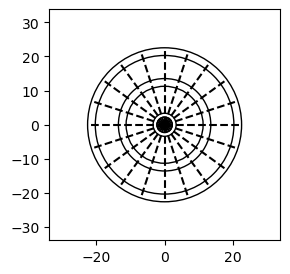

Player 1 expected score: 14.16
Player 2 expected score: 45.86
Player 3 expected score: 54.10
Enter the number of darts each player throws: 100


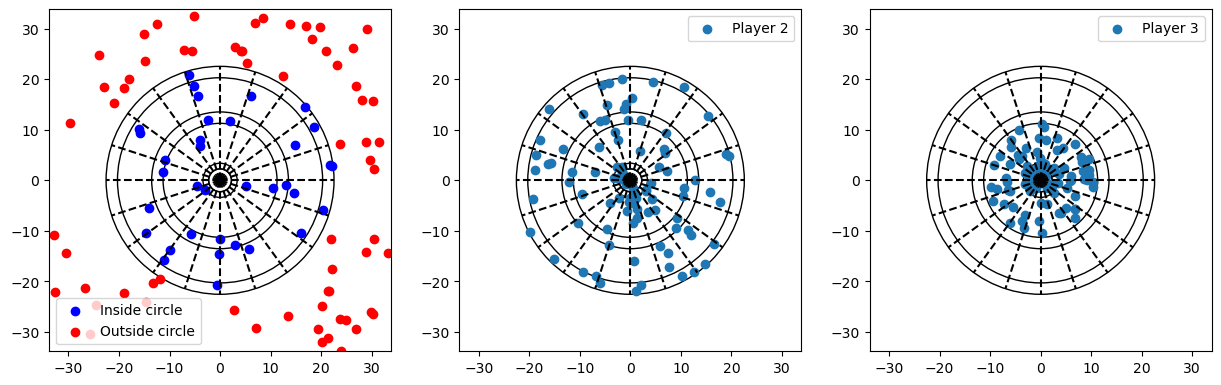

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

def draw_circle(center, radius, color='black', fill=False, fc=None):
    circle = plt.Circle(center, radius, color=color, fill=fill, fc=fc, linestyle='dashed')
    plt.gca().add_patch(circle)

def plot_dashed(x, y, *args, **kwargs):
    kwargs['linestyle'] = 'dashed'
    plt.plot(x, y, *args, **kwargs)

def draw_dartboard(ax, center, radius):
    ax.set_aspect('equal')
    ax.set_xlim([-radius, radius])
    ax.set_ylim([-radius, radius])

    circle = plt.Circle(center, radius, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.1, fill=False, color='black')
    ax.add_artist(circle)

    n = 20
    for i in range(n):
        angle = i * 2 * np.pi / n
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        if radius * 0.15 <= np.sqrt(x ** 2 + y ** 2) <= radius * 0.5:
            continue
        line = plt.Line2D([center[0], x], [center[1], y], color='black', linestyle='--')
        ax.add_artist(line)

    circle = plt.Circle(center, radius * 0.9, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.6, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.5, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.15, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.1, fill=False, color='black')
    ax.add_artist(circle)


if __name__ == '__main__':
    center = (0, 0)
    radius = 22.55
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    draw_dartboard(ax, center, radius)
    plt.xlim(-radius*1.5, radius*1.5)
    plt.ylim(-radius*1.5, radius*1.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Dart Game Simulation Functions

def throw_dart_player_1(dartboard_radius):
    half_side = 1.5 * dartboard_radius
    x = random.uniform(-half_side, half_side)
    y = random.uniform(-half_side, half_side)
    return x, y

def throw_dart_player_2(dartboard_radius):
    angle = random.uniform(0, 2 * math.pi)
    distance = random.uniform(0, dartboard_radius)
    x = distance * math.cos(angle)
    y = distance * math.sin(angle)
    return x, y

def throw_dart_player_3(small_circle_radius):
    angle = random.uniform(0, 2 * math.pi)
    distance = random.uniform(0, small_circle_radius)
    x = distance * math.cos(angle)
    y = distance * math.sin(angle)
    return x, y

def get_score(x, y, dartboard_radius):
    angle = math.atan2(y, x)
    distance = math.sqrt(x ** 2 + y ** 2)

    if distance > dartboard_radius:
        return 0

    section = math.floor((angle * 10) / math.pi) % 20 + 1
    score = section

    inner_bull_radius = 0.05 * dartboard_radius
    outer_bull_radius = 0.1 * dartboard_radius
    triple_inner_radius = 0.35 * dartboard_radius
    triple_outer_radius = 0.4 * dartboard_radius
    double_inner_radius = 0.9 * dartboard_radius
    double_outer_radius = dartboard_radius

    if distance <= inner_bull_radius:
        return 50
    elif distance <= outer_bull_radius:
        return 25
    elif triple_inner_radius <= distance <= triple_outer_radius:
        score *= 3
    elif double_inner_radius <= distance <= double_outer_radius:
        score *= 2

    return score


def get_score_player_1(x, y, dartboard_radius):
    angle = math.atan2(y, x)
    distance = math.sqrt(x ** 2 + y ** 2)
    if distance > dartboard_radius:
        return 0, True
    else:
        return get_score(x, y, dartboard_radius), False

def monte_carlo_simulation(num_simulations, dartboard_radius, small_circle_radius):
    total_scores = [0, 0, 0]
    num_throws = 3

    for _ in range(num_simulations):
        for _ in range(num_throws):
            # Player 1 throws the dart
            x1, y1 = throw_dart_player_1(dartboard_radius)
            score1, _ = get_score_player_1(x1, y1, dartboard_radius)
            total_scores[0] += score1

            # Player 2 throws the dart
            x2, y2 = throw_dart_player_2(dartboard_radius)
            score2 = get_score(x2, y2, dartboard_radius)
            total_scores[1] += score2

            # Player 3 throws the dart
            x3, y3 = throw_dart_player_3(small_circle_radius)
            score3 = get_score(x3, y3, dartboard_radius)
            total_scores[2] += score3

    expected_scores = [score / num_simulations for score in total_scores]
    return expected_scores


# Main Code Execution

if __name__ == "__main__":
    num_simulations = 100000
    dartboard_radius = 22.55
    small_circle_radius = 22.55 / 2

    expected_scores = monte_carlo_simulation(num_simulations, dartboard_radius, small_circle_radius)
    for i, score in enumerate(expected_scores, start=1):
        print(f"Player {i} expected score: {score:.2f}")

# Plotting Functions

def play_game(num_darts, dartboard_radius, small_circle_radius):
    dart_positions = [[], [], []]

    for _ in range(num_darts):
        x1, y1 = throw_dart_player_1(dartboard_radius)
        score1, outside_circle = get_score_player_1(x1, y1, dartboard_radius)
        dart_positions[0].append((x1, y1, outside_circle))

        x2, y2 = throw_dart_player_2(dartboard_radius)
        score2 = get_score(x2, y2, dartboard_radius)
        dart_positions[1].append((x2, y2))

        x3, y3 = throw_dart_player_3(small_circle_radius)
        score3 = get_score(x3, y3, dartboard_radius)
        dart_positions[2].append((x3, y3))

    return dart_positions

def plot_dart_positions(dart_positions, dartboard_radius):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, (positions, ax) in enumerate(zip(dart_positions, axs), start=1):
        center = (0, 0)
        radius = 22.55
        draw_dartboard(ax, center, radius)
        
        if i == 1:
            inside_positions = [(x, y) for x, y, outside in positions if not outside]
            outside_positions = [(x, y) for x, y, outside in positions if outside]
            ax.scatter(*zip(*inside_positions), label="Inside circle", color="blue")
            ax.scatter(*zip(*outside_positions), label="Outside circle", color="red")
        else:
            x_positions, y_positions = zip(*positions)
            ax.scatter(x_positions, y_positions, label=f"Player {i}")
        
        ax.set_xlim(-1.5 * dartboard_radius, 1.5 * dartboard_radius)
        ax.set_ylim(-1.5 * dartboard_radius, 1.5 * dartboard_radius)
        ax.set_aspect("equal")
        ax.legend()

    plt.show()

if __name__ == "__main__":
    num_darts = int(input("Enter the number of darts each player throws: "))
    dartboard_radius = 22.55
    small_circle_radius = 22.55 / 2

    dart_positions = play_game(num_darts, dartboard_radius, small_circle_radius)
    plot_dart_positions(dart_positions, dartboard_radius)

### 1. Probability and Distribution


For 3 throws and 2 sets:
Player 1 average score: 19.00, standard deviation: 2.00
Player 2 average score: 45.50, standard deviation: 23.50
Player 3 average score: 100.50, standard deviation: 38.50


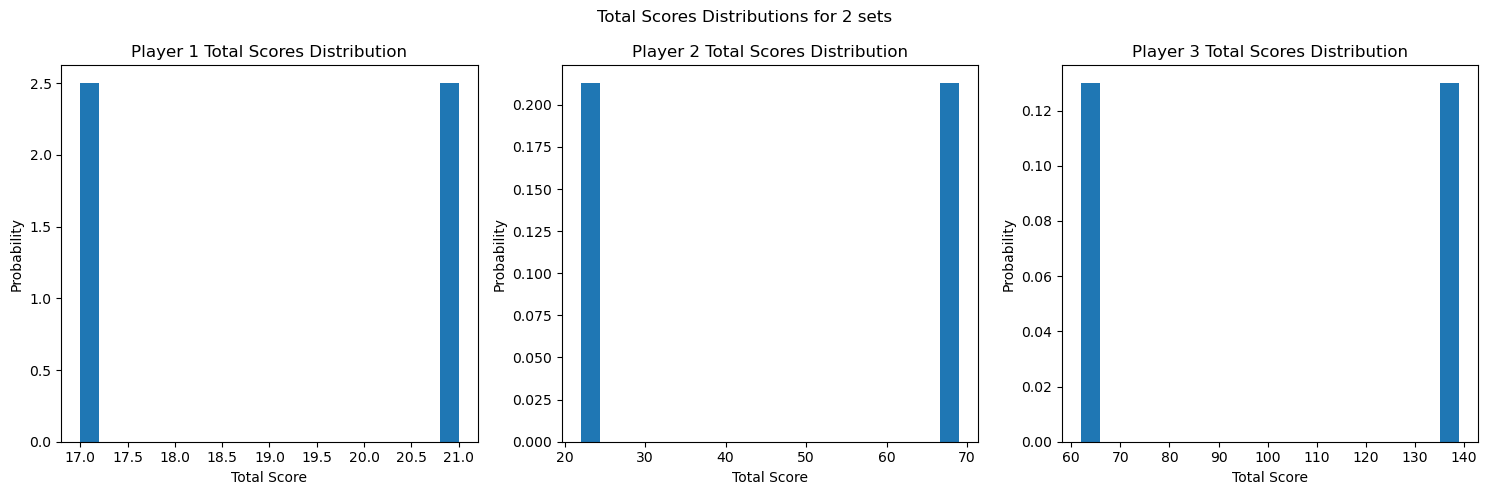


For 3 throws and 3 sets:
Player 1 average score: 12.67, standard deviation: 17.91
Player 2 average score: 45.33, standard deviation: 20.76
Player 3 average score: 36.33, standard deviation: 13.57


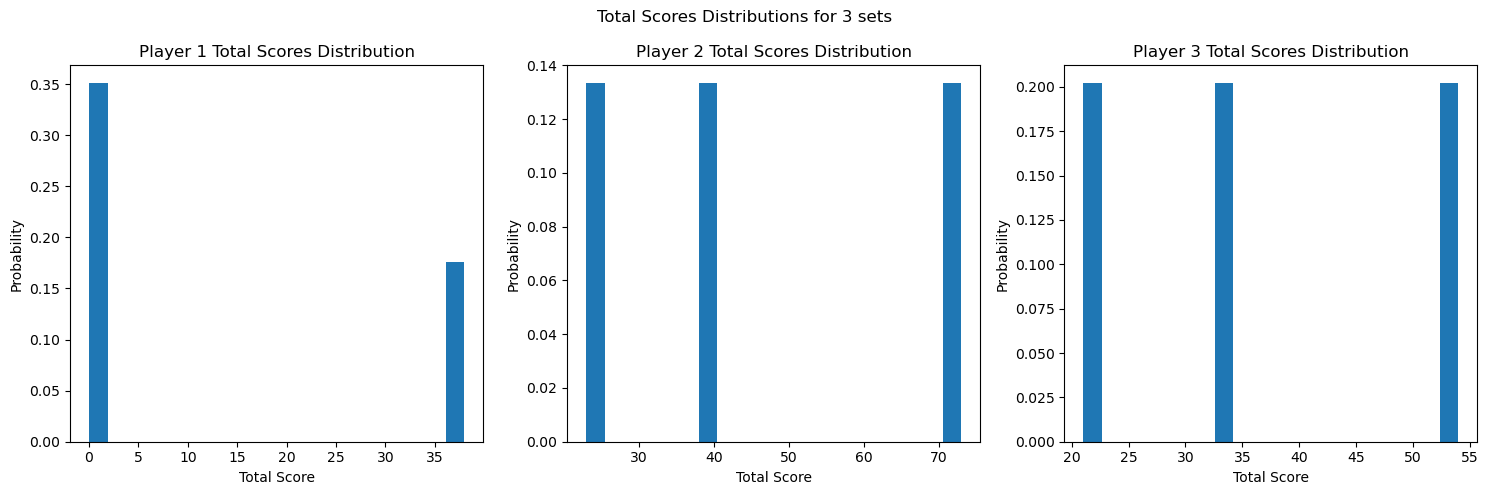


For 3 throws and 5 sets:
Player 1 average score: 11.60, standard deviation: 9.99
Player 2 average score: 45.20, standard deviation: 15.24
Player 3 average score: 56.20, standard deviation: 10.48


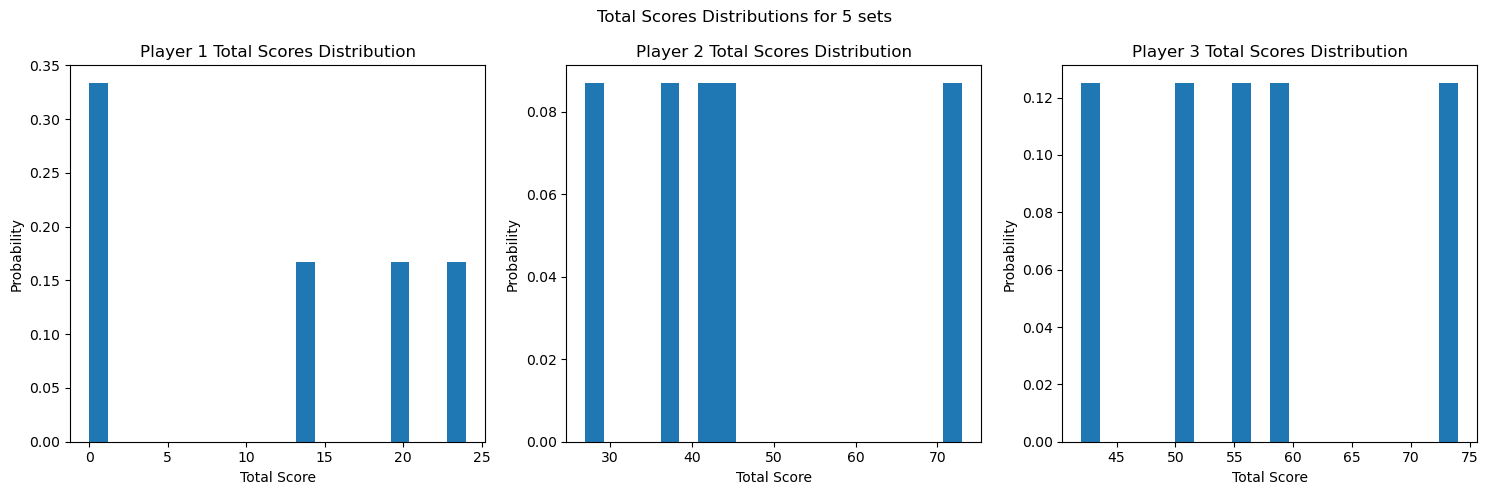


For 3 throws and 10 sets:
Player 1 average score: 19.50, standard deviation: 15.70
Player 2 average score: 48.20, standard deviation: 16.96
Player 3 average score: 54.30, standard deviation: 20.28


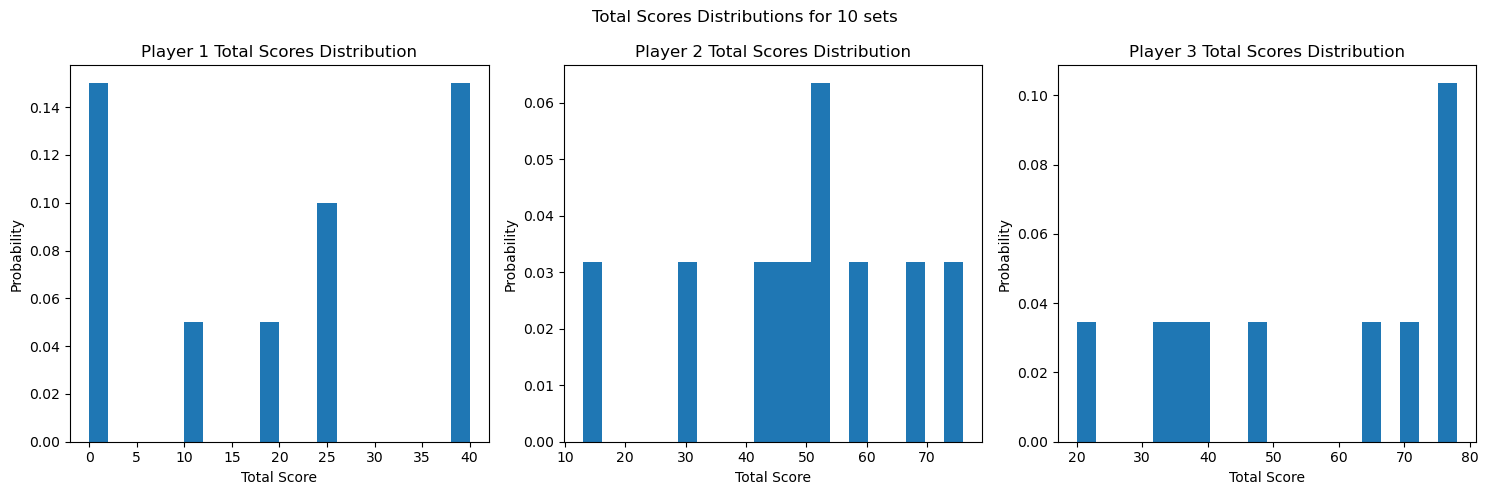


For 3 throws and 30 sets:
Player 1 average score: 11.43, standard deviation: 14.13
Player 2 average score: 50.80, standard deviation: 24.81
Player 3 average score: 55.70, standard deviation: 23.08


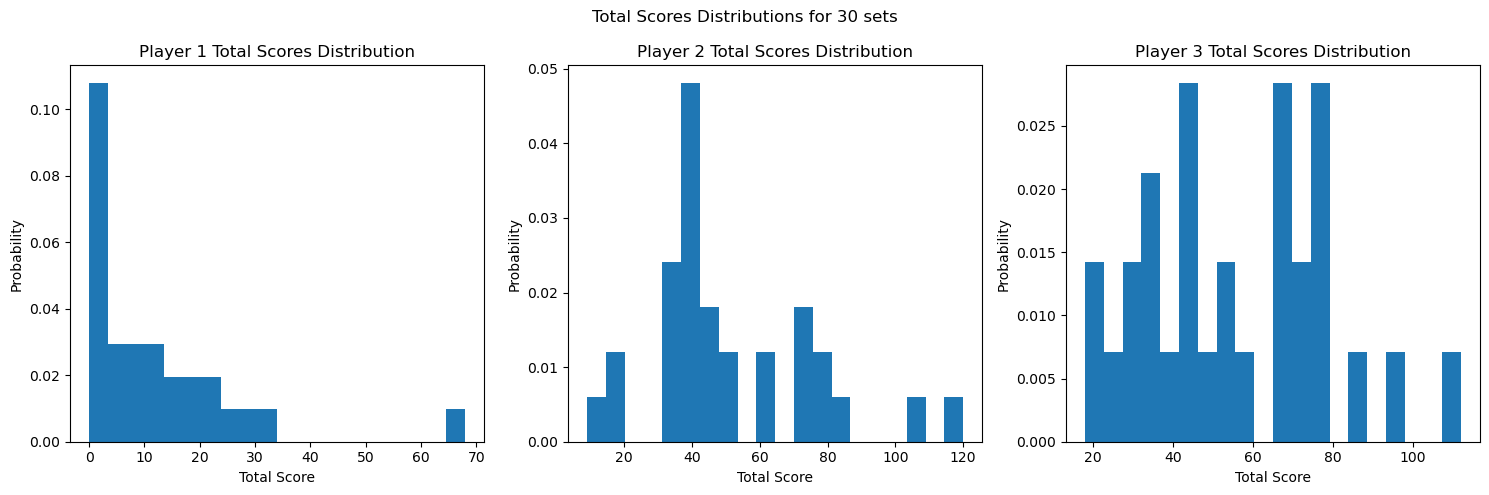


For 3 throws and 100 sets:
Player 1 average score: 14.16, standard deviation: 15.66
Player 2 average score: 43.82, standard deviation: 19.48
Player 3 average score: 56.16, standard deviation: 27.46


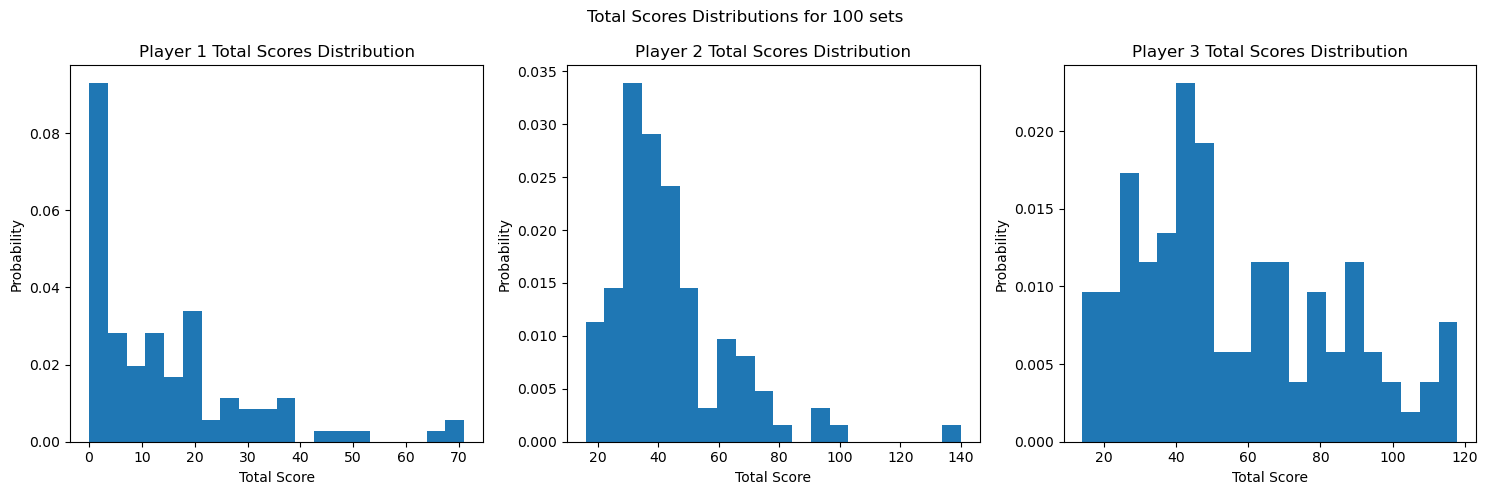


For 3 throws and 1000 sets:
Player 1 average score: 14.67, standard deviation: 15.74
Player 2 average score: 45.90, standard deviation: 21.27
Player 3 average score: 54.48, standard deviation: 26.11


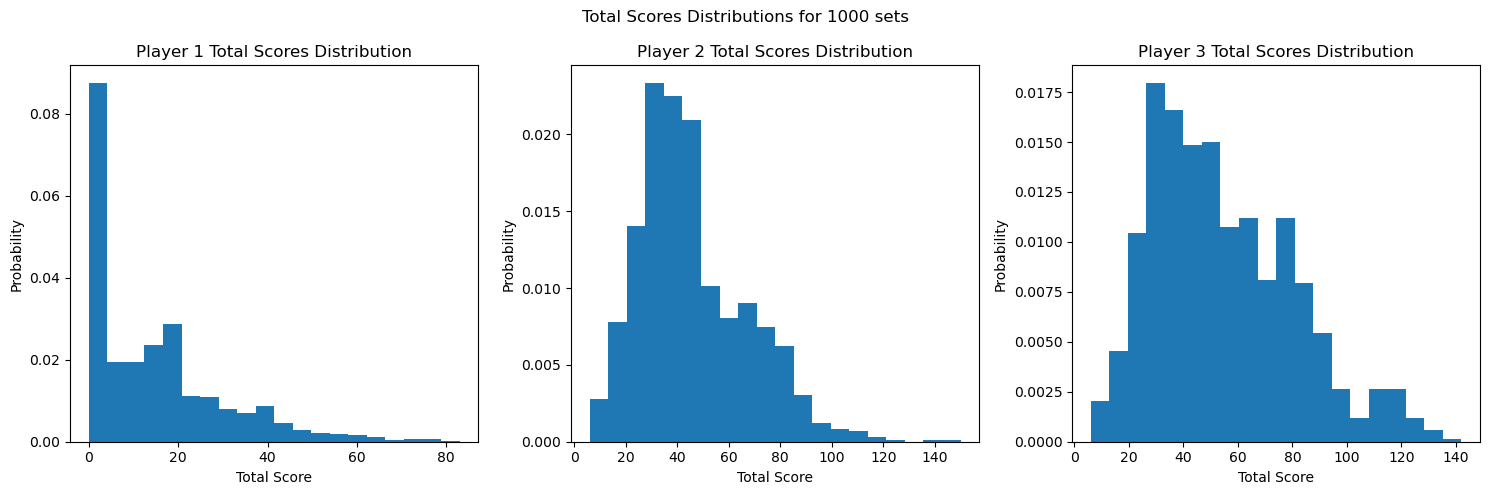


For 3 throws and 5000 sets:
Player 1 average score: 13.91, standard deviation: 14.95
Player 2 average score: 45.50, standard deviation: 20.94
Player 3 average score: 53.72, standard deviation: 25.87


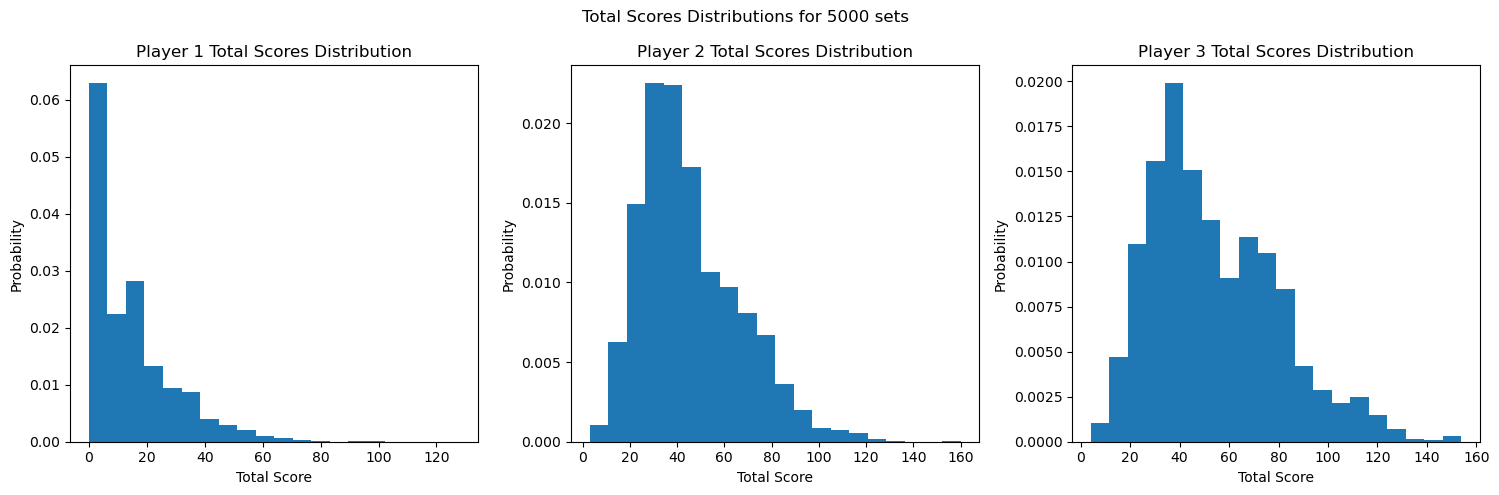


For 3 throws and 10000 sets:
Player 1 average score: 13.99, standard deviation: 15.02
Player 2 average score: 45.81, standard deviation: 21.10
Player 3 average score: 53.74, standard deviation: 25.26


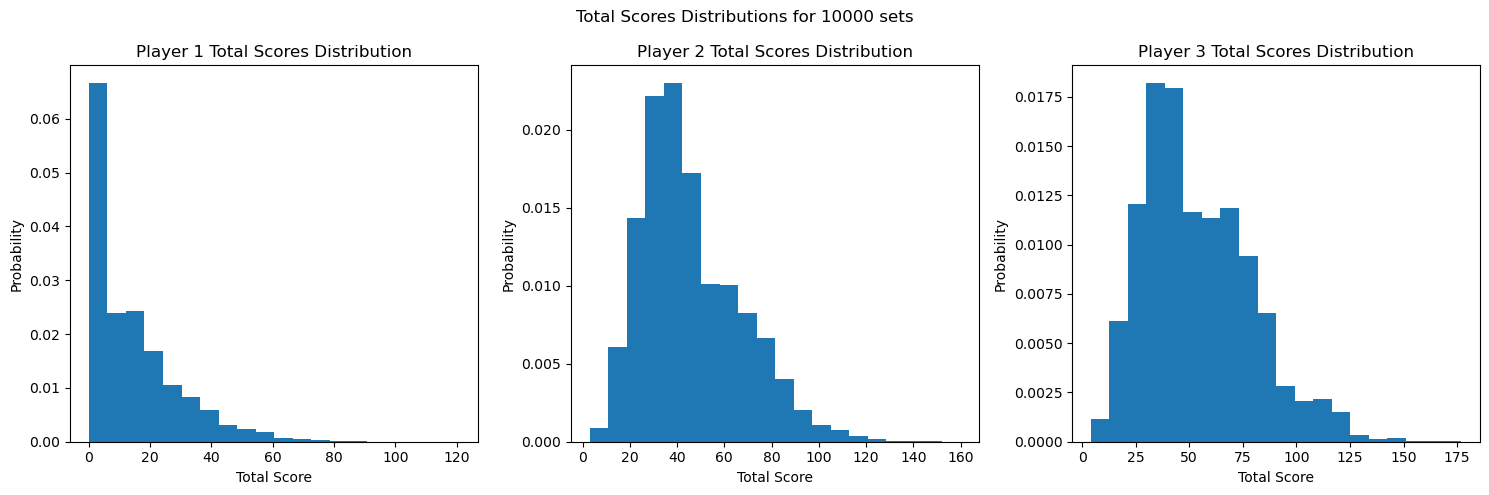


For 2 throws:
Player 1 - Mean: 0.00, Standard Deviation: 0.00
Player 2 - Mean: 19.50, Standard Deviation: 5.50
Player 3 - Mean: 10.00, Standard Deviation: 0.00


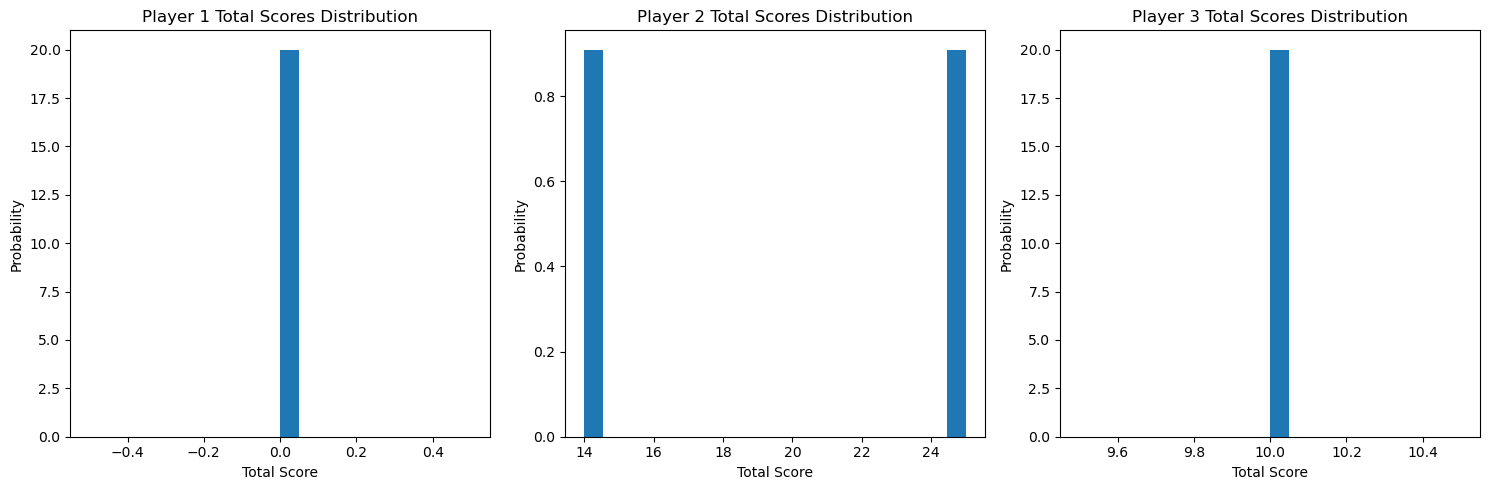


For 3 throws:
Player 1 - Mean: 2.67, Standard Deviation: 3.77
Player 2 - Mean: 15.00, Standard Deviation: 2.94
Player 3 - Mean: 19.00, Standard Deviation: 8.49


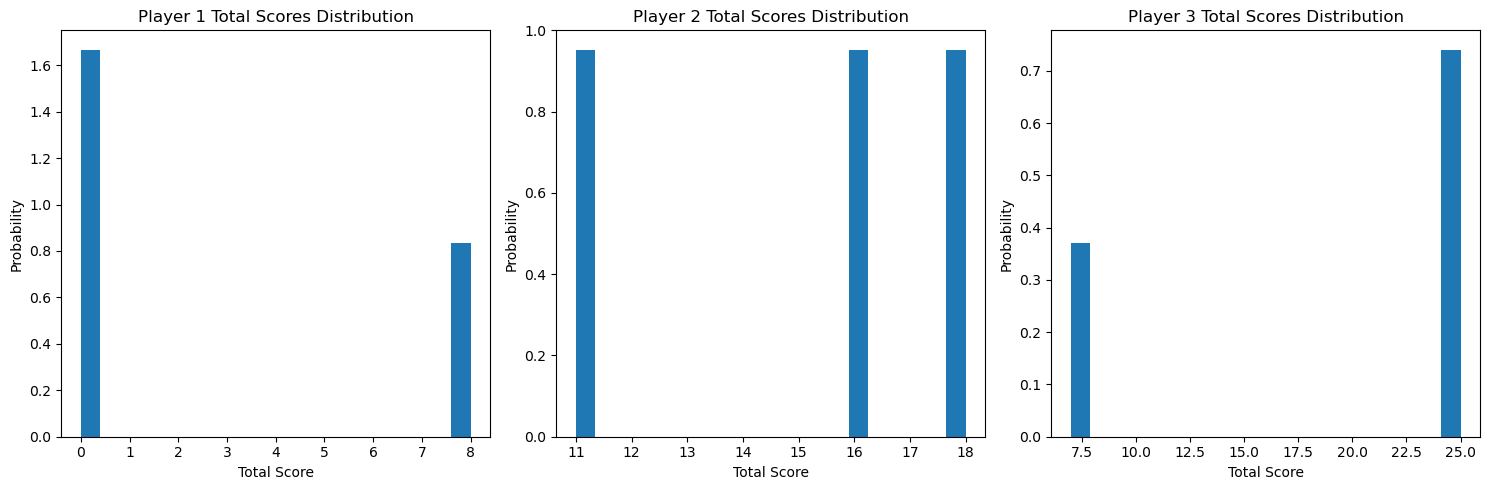


For 5 throws:
Player 1 - Mean: 14.80, Standard Deviation: 18.14
Player 2 - Mean: 19.20, Standard Deviation: 13.60
Player 3 - Mean: 16.80, Standard Deviation: 17.08


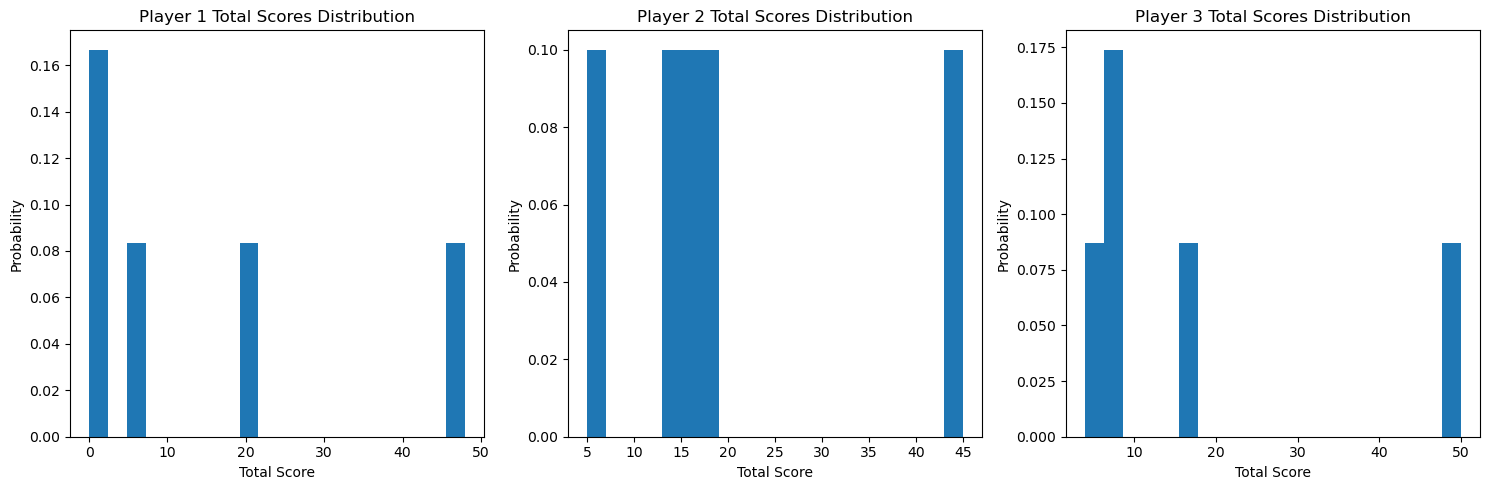


For 10 throws:
Player 1 - Mean: 4.40, Standard Deviation: 6.90
Player 2 - Mean: 22.70, Standard Deviation: 15.40
Player 3 - Mean: 19.10, Standard Deviation: 16.45


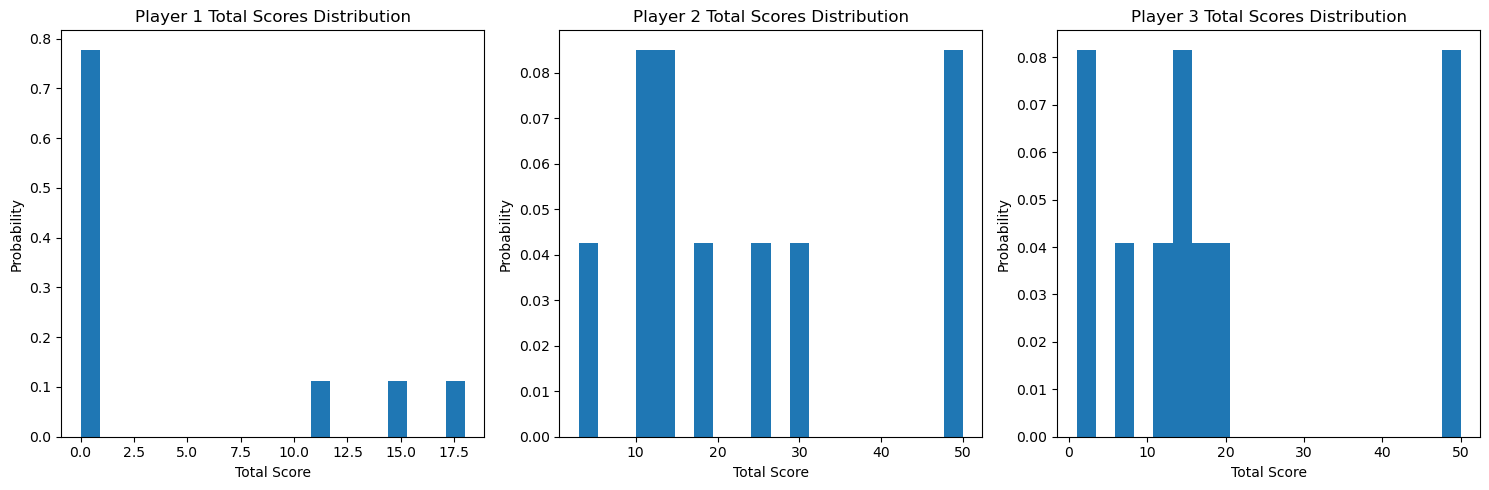


For 30 throws:
Player 1 - Mean: 2.10, Standard Deviation: 4.53
Player 2 - Mean: 18.17, Standard Deviation: 15.88
Player 3 - Mean: 23.23, Standard Deviation: 18.40


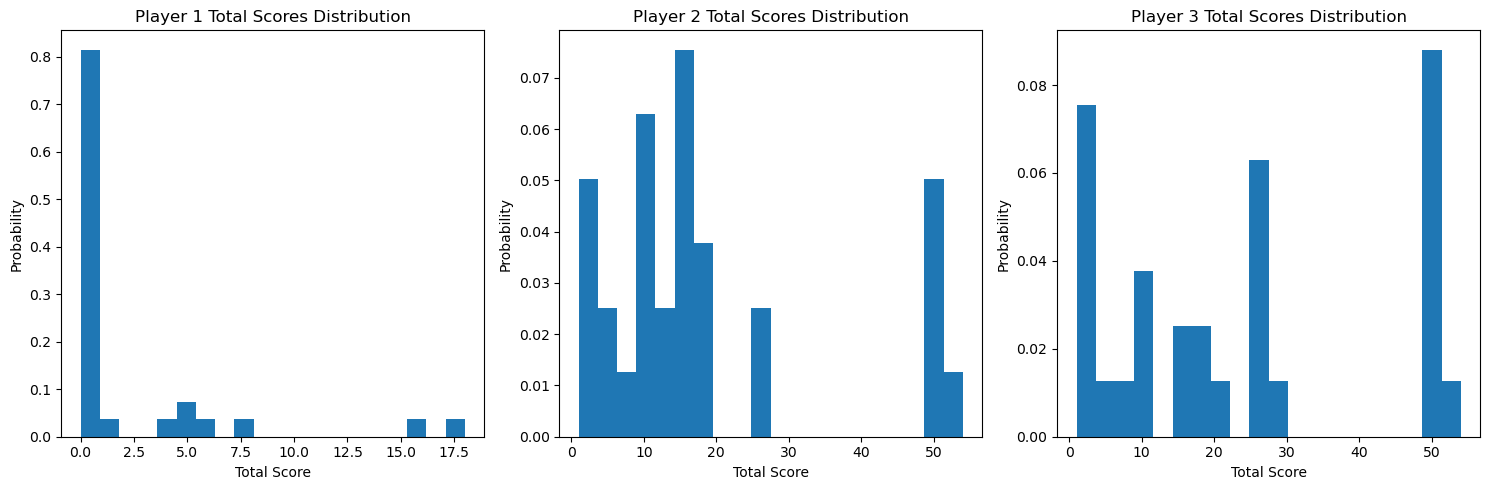


For 100 throws:
Player 1 - Mean: 4.85, Standard Deviation: 7.37
Player 2 - Mean: 18.11, Standard Deviation: 14.61
Player 3 - Mean: 15.35, Standard Deviation: 13.44


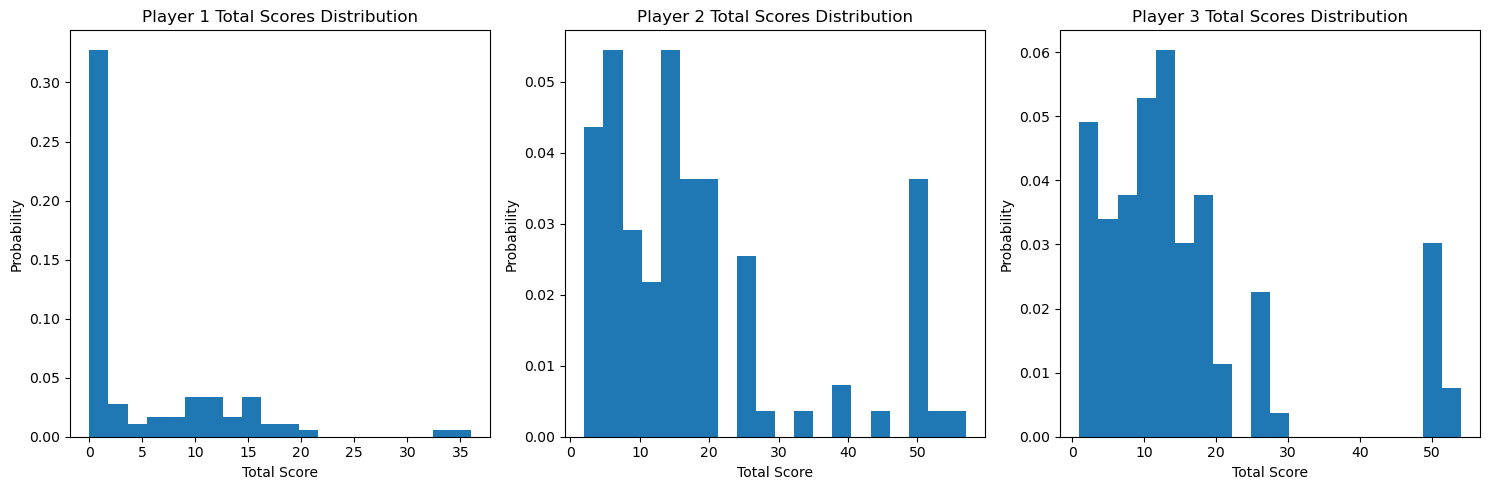


For 1000 throws:
Player 1 - Mean: 4.03, Standard Deviation: 7.84
Player 2 - Mean: 15.43, Standard Deviation: 12.31
Player 3 - Mean: 17.90, Standard Deviation: 14.52


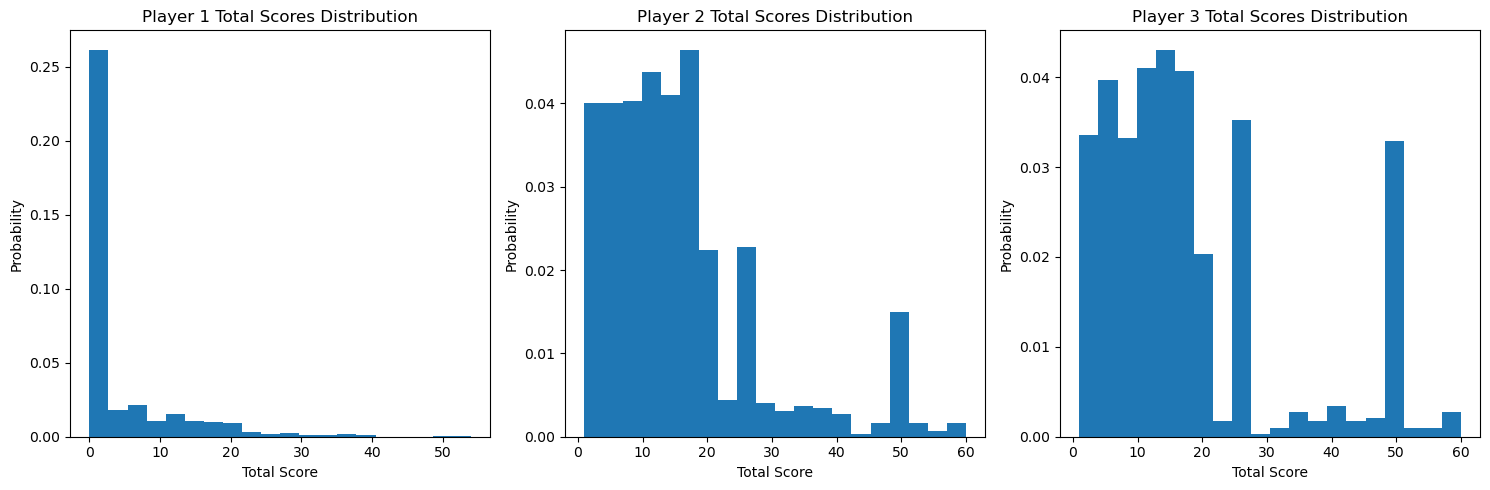


For 5000 throws:
Player 1 - Mean: 4.74, Standard Deviation: 8.54
Player 2 - Mean: 15.43, Standard Deviation: 12.40
Player 3 - Mean: 18.31, Standard Deviation: 15.00


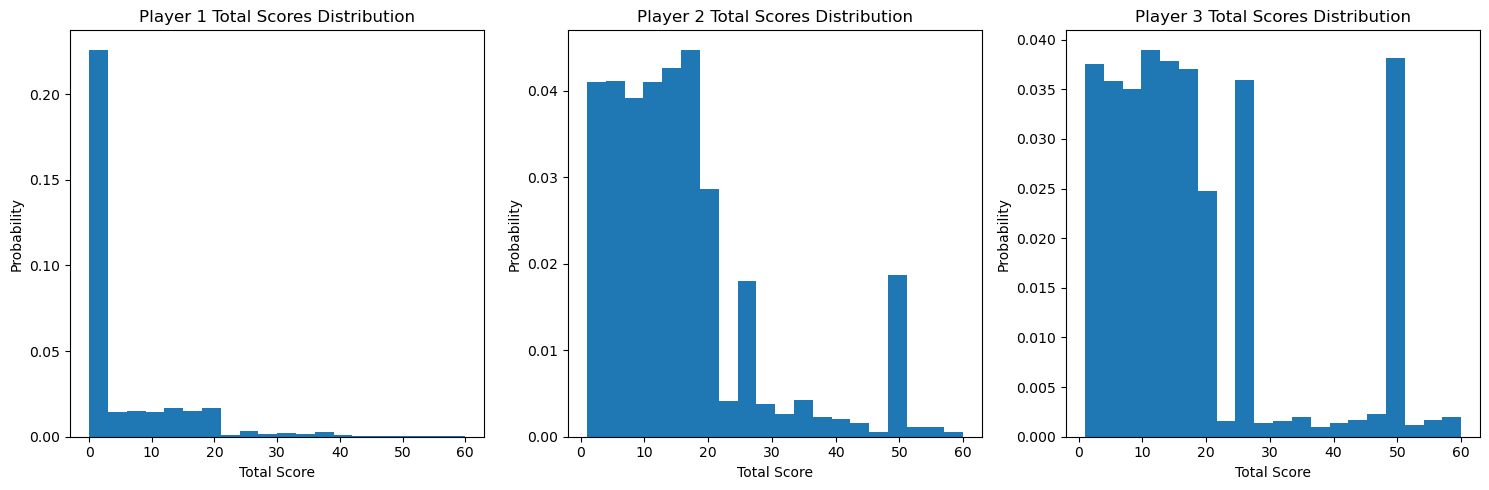


For 10000 throws:
Player 1 - Mean: 4.75, Standard Deviation: 8.65
Player 2 - Mean: 15.51, Standard Deviation: 12.57
Player 3 - Mean: 17.85, Standard Deviation: 14.53


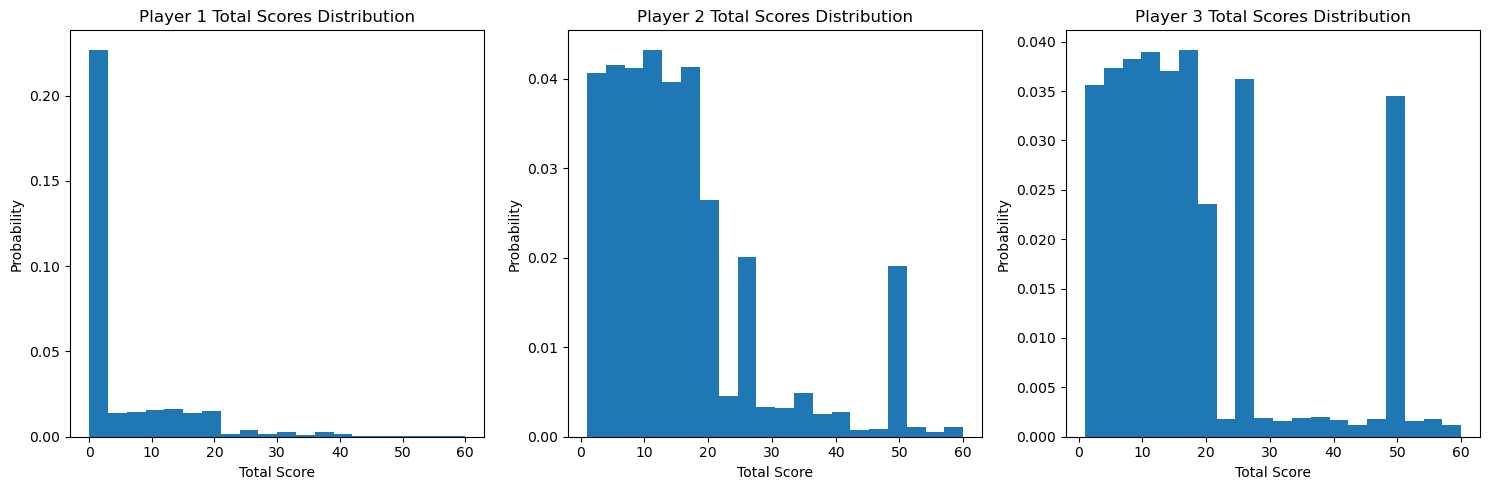

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def throw_dart_player_1(dartboard_radius):
    half_side = 1.5 * dartboard_radius
    x = random.uniform(-half_side, half_side)
    y = random.uniform(-half_side, half_side)
    return x, y

def throw_dart_player_2(dartboard_radius):
    angle = random.uniform(0, 2 * math.pi)
    distance = random.uniform(0, dartboard_radius)
    x = distance * math.cos(angle)
    y = distance * math.sin(angle)
    return x, y

def throw_dart_player_3(small_circle_radius):
    angle = random.uniform(0, 2 * math.pi)
    distance = random.uniform(0, small_circle_radius)
    x = distance * math.cos(angle)
    y = distance * math.sin(angle)
    return x, y

def get_score(x, y, dartboard_radius):
    angle = math.atan2(y, x)
    distance = math.sqrt(x ** 2 + y ** 2)

    if distance > dartboard_radius:
        return 0

    section = math.floor((angle * 10) / math.pi) % 20 + 1
    score = section

    inner_bull_radius = 0.05 * dartboard_radius
    outer_bull_radius = 0.1 * dartboard_radius
    triple_inner_radius = 0.35 * dartboard_radius
    triple_outer_radius = 0.4 * dartboard_radius
    double_inner_radius = 0.9 * dartboard_radius
    double_outer_radius = dartboard_radius

    if distance <= inner_bull_radius:
        return 50
    elif distance <= outer_bull_radius:
        return 25
    elif triple_inner_radius <= distance <= triple_outer_radius:
        score *= 3
    elif double_inner_radius <= distance <= double_outer_radius:
        score *= 2

    return score


def play_single_round(dartboard_radius, small_circle_radius, num_throws):
    total_scores = [0, 0, 0]

    for _ in range(num_throws):
        # Player 1 throws the dart
        x1, y1 = throw_dart_player_1(dartboard_radius)
        score1 = get_score(x1, y1, dartboard_radius)
        total_scores[0] += score1

        # Player 2 throws the dart
        x2, y2 = throw_dart_player_2(dartboard_radius)
        score2 = get_score(x2, y2, dartboard_radius)
        total_scores[1] += score2

        # Player 3 throws the dart
        x3, y3 = throw_dart_player_3(small_circle_radius)
        score3 = get_score(x3, y3, dartboard_radius)
        total_scores[2] += score3

    return total_scores

def simulate_games(dartboard_radius, small_circle_radius, num_throws, num_sets):
    all_total_scores_list = [[], [], []]

    for _ in range(num_sets):
        total_scores = play_single_round(dartboard_radius, small_circle_radius, num_throws)
        
        for i in range(3):
            all_total_scores_list[i].append(total_scores[i])

    return all_total_scores_list

def calculate_mean_and_std(all_total_scores_list):
    means = np.mean(all_total_scores_list, axis=1)
    stds = np.std(all_total_scores_list, axis=1)

    return means, stds

def plot_histogram(all_total_scores_list, num_sets):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i in range(3):
        axs[i].hist(all_total_scores_list[i], bins=20, density=True)
        axs[i].set_title(f"Player {i+1} Total Scores Distribution")
        axs[i].set_xlabel("Total Score")
        axs[i].set_ylabel("Probability")

    plt.suptitle(f"Total Scores Distributions for {num_sets} sets")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    dartboard_radius = 22.55
    small_circle_radius = 22.55/2
    num_throws = 3
    num_sets_list = [2, 3, 5, 10, 30, 100, 1000, 5000, 10000]

    for num_sets in num_sets_list:
        all_total_scores_list = simulate_games(dartboard_radius, small_circle_radius, num_throws, num_sets)
        means, stds = calculate_mean_and_std(all_total_scores_list)

        print(f"\nFor {num_throws} throws and {num_sets} sets:")
        for i in range(3):
            print(f"Player {i+1} average score: {means[i]:.2f}, standard deviation: {stds[i]:.2f}")

        plot_histogram(all_total_scores_list, num_sets)


import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Dart Game Simulation Functions

def throw_dart_player_1(dartboard_radius):
    half_side = 1.5 * dartboard_radius
    x = random.uniform(-half_side, half_side)
    y = random.uniform(-half_side, half_side)
    return x, y

def throw_dart_player_2(dartboard_radius):
    angle = random.uniform(0, 2 * math.pi)
    distance = random.uniform(0, dartboard_radius)
    x = distance * math.cos(angle)
    y = distance * math.sin(angle)
    return x, y

def throw_dart_player_3(small_circle_radius):
    angle = random.uniform(0, 2 * math.pi)
    distance = random.uniform(0, small_circle_radius)
    x = distance * math.cos(angle)
    y = distance * math.sin(angle)
    return x, y

def get_score(x, y, dartboard_radius):
    angle = math.atan2(y, x)
    distance = math.sqrt(x ** 2 + y ** 2)

    if distance > dartboard_radius:
        return 0

    section = math.floor((angle * 10) / math.pi) % 20 + 1
    score = section

    inner_bull_radius = 0.05 * dartboard_radius
    outer_bull_radius = 0.1 * dartboard_radius
    triple_inner_radius = 0.35 * dartboard_radius
    triple_outer_radius = 0.4 * dartboard_radius
    double_inner_radius = 0.9 * dartboard_radius
    double_outer_radius = dartboard_radius

    if distance <= inner_bull_radius:
        return 50
    elif distance <= outer_bull_radius:
        return 25
    elif triple_inner_radius <= distance <= triple_outer_radius:
        score *= 3
    elif double_inner_radius <= distance <= double_outer_radius:
        score *= 2

    return score


def get_score_player_1(x, y, dartboard_radius):
    angle = math.atan2(y, x)
    distance = math.sqrt(x ** 2 + y ** 2)
    if distance > dartboard_radius:
        return 0, True
    else:
        return get_score(x, y, dartboard_radius), False

def simulate_game(num_throws, dartboard_radius, small_circle_radius):
    player_scores = [[], [], []]

    for _ in range(num_throws):
        # Player 1 throws the dart
        x1, y1 = throw_dart_player_1(dartboard_radius)
        score1, _ = get_score_player_1(x1, y1, dartboard_radius)
        player_scores[0].append(score1)

        # Player 2 throws the dart
        x2, y2 = throw_dart_player_2(dartboard_radius)
        score2 = get_score(x2, y2, dartboard_radius)
        player_scores[1].append(score2)

        # Player 3 throws the dart
        x3, y3 = throw_dart_player_3(small_circle_radius)
        score3 = get_score(x3, y3, dartboard_radius)
        player_scores[2].append(score3)

    return player_scores

def calculate_mean_and_std(player_scores):
    means = np.mean(player_scores, axis=1)
    stds = np.std(player_scores, axis=1)
    return means, stds

def plot_histogram(player_scores):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, scores in enumerate(player_scores):
        axs[i].hist(scores, bins=20, density=True)
        axs[i].set_title(f"Player {i+1} Total Scores Distribution")
        axs[i].set_xlabel("Total Score")
        axs[i].set_ylabel("Probability")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    dartboard_radius = 1.0
    small_circle_radius = 0.5
    num_throws_list = [2, 3, 5, 10, 30, 100, 1000, 5000, 10000]

    for num_throws in num_throws_list:
        player_scores = simulate_game(num_throws, dartboard_radius, small_circle_radius)
        player_scores = np.array(player_scores)  # Convert the list to a numpy array
        means, stds = calculate_mean_and_std(player_scores)

        print(f"\nFor {num_throws} throws:")
        for i, mean, std in zip(range(1, 4), means, stds):
            print(f"Player {i} - Mean: {mean:.2f}, Standard Deviation: {std:.2f}")

        plot_histogram(player_scores)

### +. Errorbar - Distance from the Center

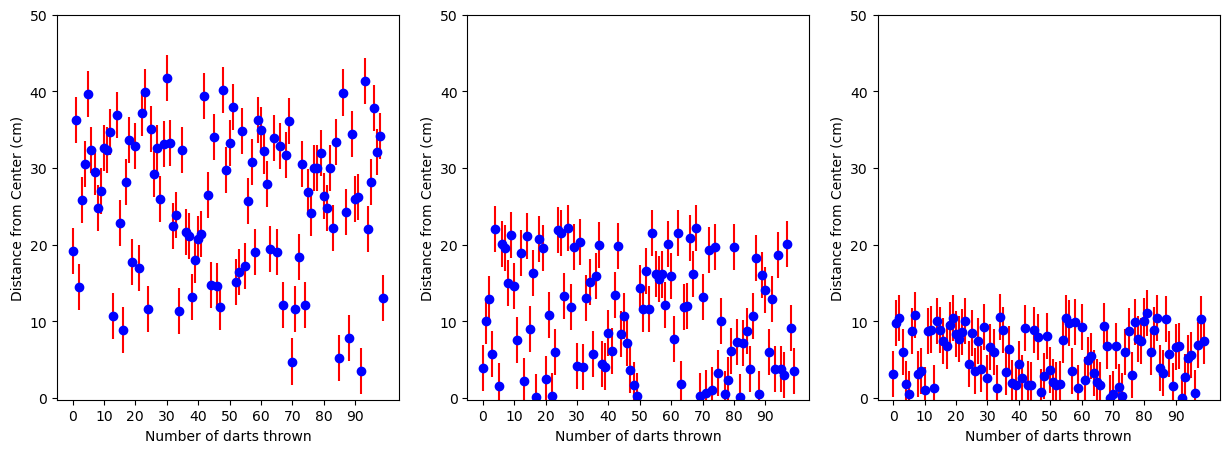

In [3]:
center = (0, 0)

fig = plt.figure(figsize=(15, 5))

for j in range(3):
    plt.subplot(1, 3, j+1)
    
    distances = [np.sqrt((dart_positions[j][i][0]-center[0])**2 + (dart_positions[j][i][1]-center[1])**2) for i in range(len(dart_positions[j]))]

    plt.errorbar(np.arange(len(dart_positions[j])), distances, yerr=3, fmt='o', color='blue', ecolor='red', capsize=0)

    plt.xlabel('Number of darts thrown')
    plt.ylabel('Distance from Center (cm)')

    n_ticks = 10
    step = math.ceil(len(dart_positions[j]) / n_ticks)
    x_ticks = np.arange(0, len(dart_positions[j]), step)
    plt.xticks(x_ticks, [str(step*i) for i in range(n_ticks)])

    plt.ylim(-0.2, 50)
    
plt.show()

### 3. Game based on physics engine
#### - Set the initilal angle of the dart to control the Projectile Motion
#### - Set the initila angle and Velocity of the Dart to Shoot the middle of the dart board

In [11]:
def draw_dartboard(ax, center, radius):
    ax.set_aspect('equal')
    ax.set_xlim([-radius, radius])
    ax.set_ylim([-radius, radius])

    circle = plt.Circle(center, radius, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.1, fill=False, color='black')
    ax.add_artist(circle)

    n = 20
    for i in range(n):
        angle = i * 2 * np.pi / n
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        if radius * 0.15 <= np.sqrt(x ** 2 + y ** 2) <= radius * 0.5:
            continue
        line = plt.Line2D([center[0], x], [center[1], y], color='black', linestyle='--')
        ax.add_artist(line)

    circle = plt.Circle(center, radius * 0.9, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.6, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.5, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.15, fill=False, color='black')
    ax.add_artist(circle)

    circle = plt.Circle(center, radius * 0.1, fill=False, color='black')
    ax.add_artist(circle)
    ax.set_ylim(-0.2255*1.5, 0.2255*1.5)
    ax.set_xlim(-0.2255*1.5, 0.2255*1.5)

In [12]:
# F = -kv
import numpy as np
import matplotlib.pyplot as plt


def calculate_trajectory(alpha, beta, V0, difficulty, x_target=2.37, m=0.025, k=0.05):
    alpha = np.radians(alpha)
    beta = np.radians(beta)
    value_under_sqrt = 1 - np.cos(alpha)**2 - np.cos(beta)**2
    if value_under_sqrt < 0:
        raise ValueError("Invalid combination of alpha and beta angles.")
        
    ramda = np.arccos(np.sqrt(value_under_sqrt))

    if difficulty == "beginner":
        V_prime = 5
    elif difficulty == "intermediate":
        V_prime = 10
    elif difficulty == "advanced":
        V_prime = 15
    else:
        raise ValueError("Invalid difficulty level. Choose from 'beginner', 'intermediate', or 'advanced'.")

    # Calculate time of flight using t = R / V0cos(alpha)
    t_flight = x_target / (V0 * np.cos(alpha))

    # Calculate x, y, and z positions over time
    t = np.linspace(0, t_flight, num=1000)
    x_vals = V0 * np.cos(alpha) * t
    y_vals = V0 * np.cos(beta) * t - 0.5 * 9.81 * t**2
    z_vals = (V0 * np.cos(ramda) + V_prime) * m / k * (1 - np.exp(-k * t / m)) - V_prime * t

    return x_vals, y_vals, z_vals

def plot_all_graphs(x_vals, y_vals, z_vals):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 5))
    
    center = (0, 0)
    radius = 0.2255
    
    draw_dartboard(ax1, center, radius)
    ax1.scatter(z_vals[-1], y_vals[-1], s=50, c='r', marker='o', label='Dart arrival point')
    ax1.set_xlabel('z')
    ax1.set_ylabel('y')
    ax1.set_title('Dart Arrival Point on (y, z) plane')
    ax1.legend()
    ax1.grid()

    # Plot trajectory on (x, y) plane
    ax2.plot(x_vals, y_vals, label='Trajectory')
    ax2.scatter(x_vals[-1], y_vals[-1], label='Dart arrival point', color='red')
    ax2.set_xlabel('x')
    ax3.set_xlim(0, 3)
    ax2.set_ylabel('y')
    ax2.set_title('Dart Trajectory on (x, y) plane')
    ax2.axvline(2.37, color='black', linestyle='--', label='Location of the Dart Board')
    ax2.legend()
    ax2.grid()

    # Plot trajectory on (x, z) plane
    ax3.plot(x_vals, z_vals, label='Trajectory')
    ax3.scatter(x_vals[-1], z_vals[-1], label='Dart arrival point', color='red')
    ax3.set_xlabel('x')
    ax3.set_xlim(0, 3)
    ax3.set_ylabel('z')
    ax3.set_title('Dart Trajectory on (x, z) plane')
    ax3.axvline(2.37, color='black', linestyle='--', label='Location of the Dart Board')
    ax3.legend()
    ax3.grid()

    plt.show()

if __name__ == "__main__":
    try:
        alpha = float(input("Enter alpha angle (in degrees): "))
        beta = float(input("Enter beta angle (in degrees): "))
        V0 = float(input("Enter initial velocity (in m/s): "))
        difficulty = input("Enter difficulty level (beginner, intermediate, advanced): ").lower()
        x_vals, y_vals, z_vals = calculate_trajectory(alpha, beta, V0, difficulty)
        plot_all_graphs(x_vals, y_vals, z_vals)
        print("The dart hits the target at (z, y) = ({:.2f}, {:.2f})".format(z_vals[-1], y_vals[-1]))
    except ValueError as e:
        print(e)

Enter alpha angle (in degrees): 20
Enter beta angle (in degrees): 20
Enter initial velocity (in m/s): 10
Enter difficulty level (beginner, intermediate, advanced): beginner
Invalid combination of alpha and beta angles.


Enter alpha angle (in degrees): 35
Enter beta angle (in degrees): 70
Enter initial velocity (in m/s): 6.5
Enter difficulty level (beginner, intermediate, advanced): beginner


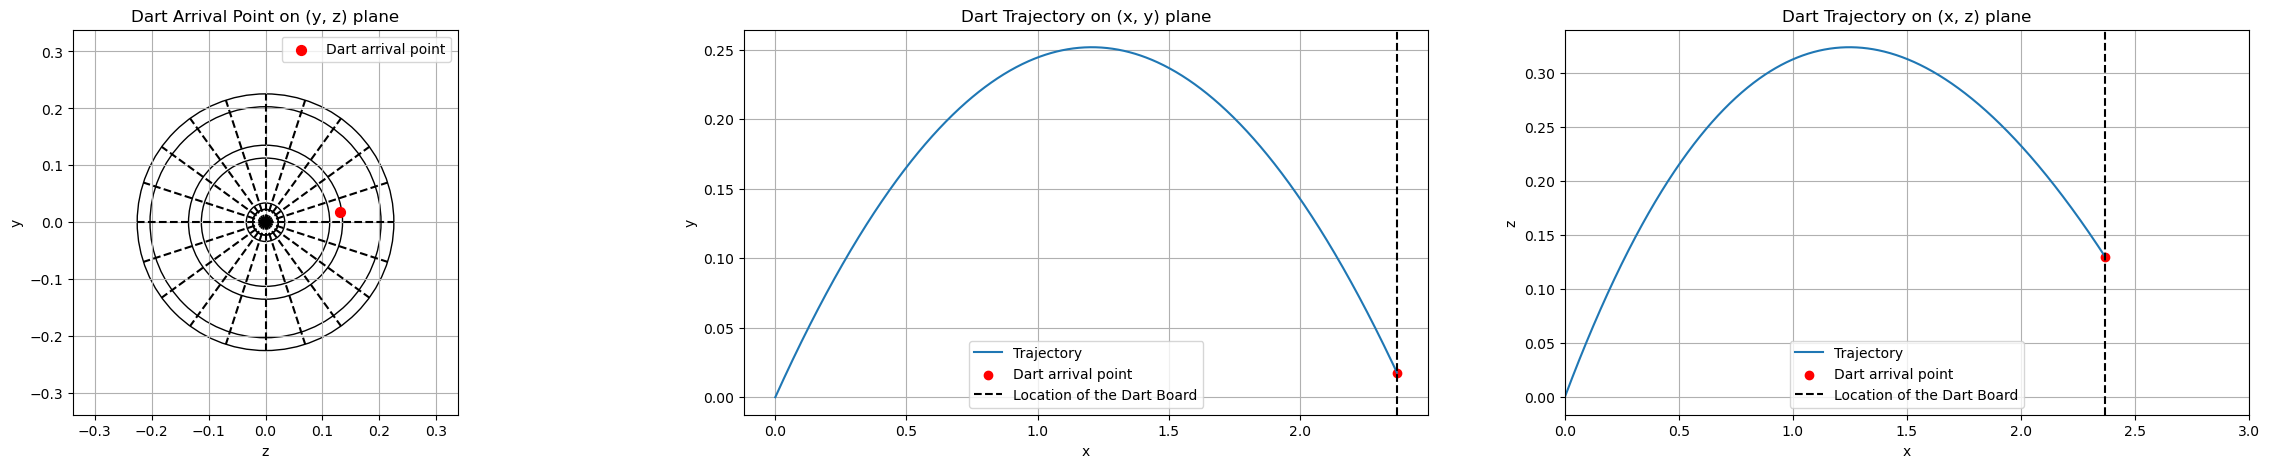

The dart hits the target at (z, y) = (0.13, 0.02)


In [13]:
# F = -kv
import numpy as np
import matplotlib.pyplot as plt


def calculate_trajectory(alpha, beta, V0, difficulty, x_target=2.37, m=0.025, k=0.05):
    alpha = np.radians(alpha)
    beta = np.radians(beta)
    value_under_sqrt = 1 - np.cos(alpha)**2 - np.cos(beta)**2
    if value_under_sqrt < 0:
        raise ValueError("Invalid combination of alpha and beta angles.")
        
    ramda = np.arccos(np.sqrt(value_under_sqrt))

    if difficulty == "beginner":
        V_prime = 5
    elif difficulty == "intermediate":
        V_prime = 10
    elif difficulty == "advanced":
        V_prime = 15
    else:
        raise ValueError("Invalid difficulty level. Choose from 'beginner', 'intermediate', or 'advanced'.")

    # Calculate time of flight using t = R / V0cos(alpha)
    t_flight = x_target / (V0 * np.cos(alpha))

    # Calculate x, y, and z positions over time
    t = np.linspace(0, t_flight, num=1000)
    x_vals = V0 * np.cos(alpha) * t
    y_vals = V0 * np.cos(beta) * t - 0.5 * 9.81 * t**2
    z_vals = (V0 * np.cos(ramda) + V_prime) * m / k * (1 - np.exp(-k * t / m)) - V_prime * t

    return x_vals, y_vals, z_vals

def plot_all_graphs(x_vals, y_vals, z_vals):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 5))
    
    center = (0, 0)
    radius = 0.2255
    
    draw_dartboard(ax1, center, radius)
    ax1.scatter(z_vals[-1], y_vals[-1], s=50, c='r', marker='o', label='Dart arrival point')
    ax1.set_xlabel('z')
    ax1.set_ylabel('y')
    ax1.set_title('Dart Arrival Point on (y, z) plane')
    ax1.legend()
    ax1.grid()

    # Plot trajectory on (x, y) plane
    ax2.plot(x_vals, y_vals, label='Trajectory')
    ax2.scatter(x_vals[-1], y_vals[-1], label='Dart arrival point', color='red')
    ax2.set_xlabel('x')
    ax3.set_xlim(0, 3)
    ax2.set_ylabel('y')
    ax2.set_title('Dart Trajectory on (x, y) plane')
    ax2.axvline(2.37, color='black', linestyle='--', label='Location of the Dart Board')
    ax2.legend()
    ax2.grid()

    # Plot trajectory on (x, z) plane
    ax3.plot(x_vals, z_vals, label='Trajectory')
    ax3.scatter(x_vals[-1], z_vals[-1], label='Dart arrival point', color='red')
    ax3.set_xlabel('x')
    ax3.set_xlim(0, 3)
    ax3.set_ylabel('z')
    ax3.set_title('Dart Trajectory on (x, z) plane')
    ax3.axvline(2.37, color='black', linestyle='--', label='Location of the Dart Board')
    ax3.legend()
    ax3.grid()

    plt.show()

if __name__ == "__main__":
    try:
        alpha = float(input("Enter alpha angle (in degrees): "))
        beta = float(input("Enter beta angle (in degrees): "))
        V0 = float(input("Enter initial velocity (in m/s): "))
        difficulty = input("Enter difficulty level (beginner, intermediate, advanced): ").lower()
        x_vals, y_vals, z_vals = calculate_trajectory(alpha, beta, V0, difficulty)
        plot_all_graphs(x_vals, y_vals, z_vals)
        print("The dart hits the target at (z, y) = ({:.2f}, {:.2f})".format(z_vals[-1], y_vals[-1]))
    except ValueError as e:
        print(e)

Enter alpha angle (in degrees): 35
Enter beta angle (in degrees): 70
Enter initial velocity (in m/s): 6.5
Enter difficulty level (beginner, intermediate, advanced): beginner


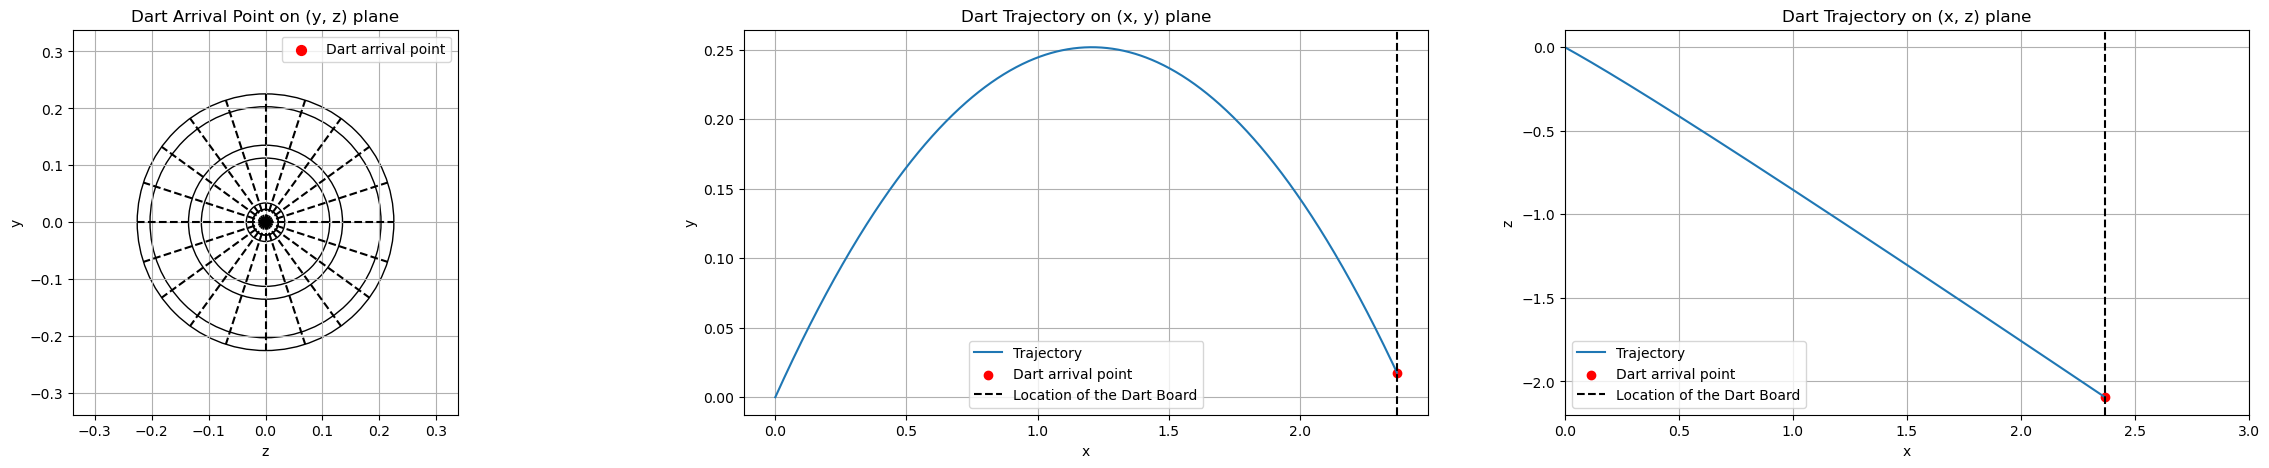

The dart hits the target at (z, y) = (-2.09, 0.02)


In [14]:
# F = -kv^2

import numpy as np
import matplotlib.pyplot as plt


def calculate_trajectory(alpha, beta, V0, difficulty, x_target=2.37, m=0.025, k=0.05):
    alpha = np.radians(alpha)
    beta = np.radians(beta)
    value_under_sqrt = 1 - np.cos(alpha)**2 - np.cos(beta)**2
    if value_under_sqrt < 0:
        raise ValueError("Invalid combination of alpha and beta angles.")
        
    ramda = np.arccos(np.sqrt(value_under_sqrt))

    if difficulty == "beginner":
        V_prime = 5
    elif difficulty == "intermediate":
        V_prime = 10
    elif difficulty == "advanced":
        V_prime = 15
    else:
        raise ValueError("Invalid difficulty level. Choose from 'beginner', 'intermediate', or 'advanced'.")

    # Calculate time of flight using t = R / V0cos(alpha)
    t_flight = x_target / (V0 * np.cos(alpha))

    # Calculate x, y, and z positions over time
    t = np.linspace(0, t_flight, num=1000)
    x_vals = V0 * np.cos(alpha) * t
    y_vals = V0 * np.cos(beta) * t - 0.5 * 9.81 * t**2
    z_vals = m / (k * (V0 * np.cos(ramda) + V_prime)) * np.log(k * t * (V0 * np.cos(ramda) + V_prime) / m + 1) - V_prime * t

    return x_vals, y_vals, z_vals

def plot_all_graphs(x_vals, y_vals, z_vals):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 5))
    
    center = (0, 0)
    radius = 0.2255
    
    draw_dartboard(ax1, center, radius)
    ax1.scatter(z_vals[-1], y_vals[-1], s=50, c='r', marker='o', label='Dart arrival point')
    ax1.set_xlabel('z')
    ax1.set_ylabel('y')
    ax1.set_title('Dart Arrival Point on (y, z) plane')
    ax1.legend()
    ax1.grid()

    # Plot trajectory on (x, y) plane
    ax2.plot(x_vals, y_vals, label='Trajectory')
    ax2.scatter(x_vals[-1], y_vals[-1], label='Dart arrival point', color='red')
    ax2.set_xlabel('x')
    ax3.set_xlim(0, 3)
    ax2.set_ylabel('y')
    ax2.set_title('Dart Trajectory on (x, y) plane')
    ax2.axvline(2.37, color='black', linestyle='--', label='Location of the Dart Board')
    ax2.legend()
    ax2.grid()

    # Plot trajectory on (x, z) plane
    ax3.plot(x_vals, z_vals, label='Trajectory')
    ax3.scatter(x_vals[-1], z_vals[-1], label='Dart arrival point', color='red')
    ax3.set_xlabel('x')
    ax3.set_xlim(0, 3)
    ax3.set_ylabel('z')
    ax3.set_title('Dart Trajectory on (x, z) plane')
    ax3.axvline(2.37, color='black', linestyle='--', label='Location of the Dart Board')
    ax3.legend()
    ax3.grid()

    plt.show()

if __name__ == "__main__":
    try:
        alpha = float(input("Enter alpha angle (in degrees): "))
        beta = float(input("Enter beta angle (in degrees): "))
        V0 = float(input("Enter initial velocity (in m/s): "))
        difficulty = input("Enter difficulty level (beginner, intermediate, advanced): ").lower()
        x_vals, y_vals, z_vals = calculate_trajectory(alpha, beta, V0, difficulty)
        plot_all_graphs(x_vals, y_vals, z_vals)
        print("The dart hits the target at (z, y) = ({:.2f}, {:.2f})".format(z_vals[-1], y_vals[-1]))
    except ValueError as e:
        print(e)